In [1]:
import os
import csv
import pandas as pd
import numpy as np


from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


file_dir_train = os.path.join(os.getcwd(), 'train.csv')
file_dir_test = os.path.join(os.getcwd(), 'test.csv')
df_train = pd.read_csv(file_dir_train)
df_test = pd.read_csv(file_dir_test)

X_train = np.array(df_train.iloc[:,1:])
y_train = np.array(df_train.iloc[:,0])
X_test= np.array(df_test.iloc[:,1:])
y_test = np.array(df_test.iloc[:,0])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error'):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [3]:
mlp = MLPClassifier(random_state=1)

parameter_space = {
    'max_iter' : [10, 20, 30],
    'hidden_layer_sizes' : [(30), (50), (80), (100)],
    'activation' : ['relu', 'tanh'],
    'solver' : ['sgd', 'adam'],
    'alpha' : [0.0001, 0.05],
    'learning_rate' : [ 'constant', 'adaptive']
}
clf, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, mlp, parameter_space, 5)


Fitting 5 folds for each of 192 candidates, totalling 960 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
print(clf.cv_results_)

{'mean_fit_time': array([19.45162086, 30.31282454, 32.93578048, 33.30068564, 37.67184091,
       43.39020681, 14.78628531, 15.83903151, 28.47079811, 27.79804063,
       35.25853901, 35.03053918, 15.56571803, 16.29709744, 26.4072072 ,
       28.81783128, 37.42827091, 58.25207586, 13.44550762, 31.86300979,
       32.83168888, 27.97785554, 37.88181443, 42.79601378, 18.07729058,
       21.77270875, 36.46517596, 43.16238217, 54.87204013, 63.42199378,
       19.23409586, 21.93124962, 36.86777258, 42.64480906, 54.51191258,
       63.75572982, 22.77197833, 27.32876582, 44.34151063, 53.60931301,
       66.46434636, 81.33525867, 23.17833285, 28.59235396, 44.83808584,
       53.78882737, 64.35549002, 72.47743335, 12.85400701, 12.39597893,
       21.44020276, 21.54095879, 27.85610094, 29.58013816, 10.03581185,
       10.42074409, 18.60326362, 19.90967326, 27.72231183, 30.44238763,
       12.45519309, 14.00079641, 25.20659332, 27.91988435, 37.2075068 ,
       41.21907301, 13.15507545, 14.3698205 , 

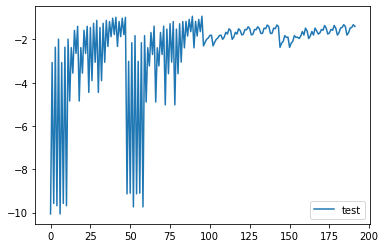

In [6]:
test_scores = clf.cv_results_['mean_test_score']
#train_scores = clf.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
#plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [ ]:
print('Best parameters found:\n', clf.best_params_)